In [1]:
import numpy as np
import os
from train import model_fn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = '../data/processed/'
data_name = 'top_10_authors.json'
data_name = 'top10.json'
prefix = data_name[:-5]
file_embedding = prefix + '_embedding.pkl'
file_dict = prefix + '_dict.pkl'
tokenized_train_data = prefix + '_train.pkl'
tokenized_valid_data = prefix + '_valid.pkl'
tokenized_test_data = prefix + '_test.pkl'


In [3]:
MODEL , hist = model_fn('./trained_models');

Loading model.
model_info: {'INPUT_DIM': 17866, 'WORD_EMBEDDING_DIM': 100, 'N_FILTERS': 100, 'FILTER_SIZES': [2, 3, 4], 'AUTHOR_DIM': 2, 'DROPOUT': 0.5, 'PAD_IDX': 1, 'TRAIN_HISTORY': ([450.0, 450.0, 449.53333333333336, 449.3333333333333, 448.4, 441.53333333333336, 439.46666666666664, 435.6, 428.06666666666666, 423.8666666666667, 416.46666666666664, 417.73333333333335, 416.8, 412.4, 407.1333333333333, 401.53333333333336, 394.8, 390.93333333333334, 377.6, 374.0], [415.0, 415.0, 415.0, 414.0, 414.0, 411.0, 406.0, 403.0, 415.0, 393.0, 402.0, 403.0, 414.0, 409.0, 399.0, 409.0, 414.0, 410.0, 405.0, 402.0]), 'LR': 0.004, 'MARGIN': 0.24}
Done loading model.


In [4]:
from siamese_triplet import data_to_Iterator, extract_embeddings
mnist_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

author_list =  ['alfred_lord_tennyson', 'algernon_charles_swinburne', 'robert_browning', 'alexander_pope', 'walt_whitman', 'william_wordsworth', 'william_shakespeare', 
                'edmund_spenser', 'matthew_arnold', 'percy_shelley', 'beowulf', 'john_dryden'] 

author_list =  ['Tennyson', 'Swinburne', 'Browning', 'Pope', 'Whitman', 'Wordsworth', 'Shakespeare', 
                'Spenser', 'Arnold', 'Shelley', 'Beowulf', 'Dryden'] 

author_dict = {i: j  for i,j in enumerate(author_list)}


mnist_classes = [author_dict[i] for i in mnist_classes]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf','#17cf84', '#1e2161']
def plot_embeddings(embeddings, targets, xlim=None, ylim=None,  save_plot= None,linewidths=2 ,legend= False,
                   figsize=(12,12),leyend_prop=18):
    plt.figure(figsize=(figsize))
    for i in range(10):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=1,linewidths=linewidths , color=colors[i])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if legend: plt.legend(mnist_classes, prop={'size': leyend_prop} )
    plt.tick_params(axis='both', labelsize=20)
    if save_plot!=None:
        plt.savefig('../media/'+save_plot)

In [5]:
train_Loader = data_to_Iterator(data_dir,tokenized_train_data, False)
test_Loader = data_to_Iterator(data_dir,tokenized_test_data,False)
valid_Loader = data_to_Iterator(data_dir,tokenized_valid_data, False)

In [6]:
train_embeddings_otl, train_labels_otl = extract_embeddings(train_Loader, MODEL, 2)
valid_embeddings_otl, valid_labels_otl = extract_embeddings(valid_Loader, MODEL, 2)
test_embeddings_otl, test_labels_otl = extract_embeddings(test_Loader, MODEL, 2)

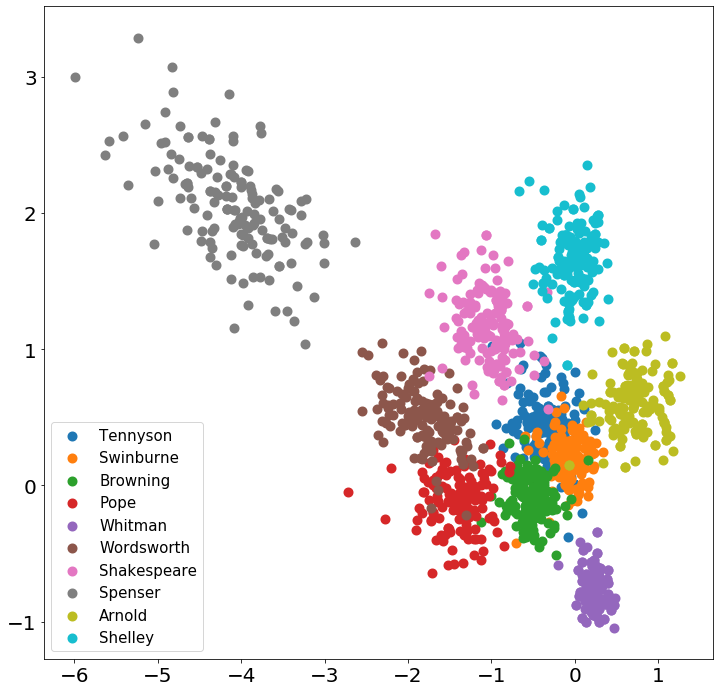

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNC

KNN = KNC(n_neighbors=3)

KNN.fit(train_embeddings_otl, train_labels_otl)
plot_embeddings(train_embeddings_otl, train_labels_otl, save_plot='training.png', linewidths=4, legend= True, leyend_prop=15)

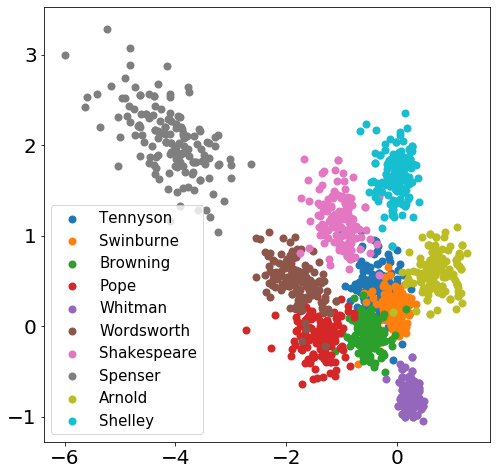

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNC

KNN = KNC(n_neighbors=3)

KNN.fit(train_embeddings_otl, train_labels_otl)
plot_embeddings(train_embeddings_otl, train_labels_otl, save_plot='training.png', legend= True, leyend_prop=15,figsize=(8,8))

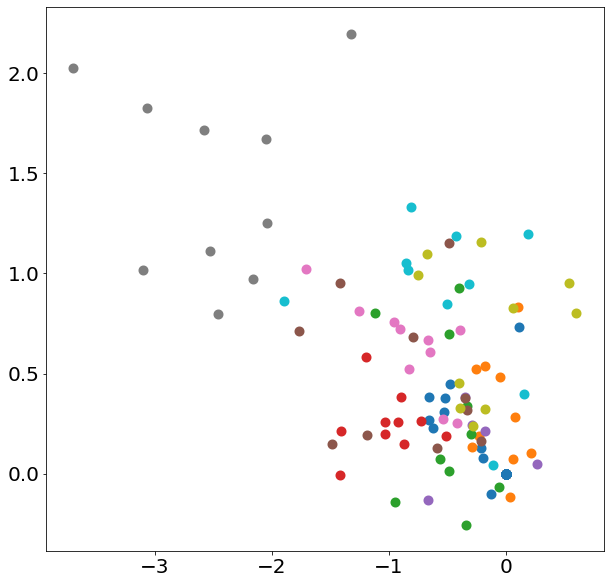

In [9]:
plot_embeddings(valid_embeddings_otl, valid_labels_otl,save_plot='valid.png',linewidths=4, figsize=(10,10))

In [10]:
KNN.score(valid_embeddings_otl,valid_labels_otl),KNN.score(train_embeddings_otl,train_labels_otl)

(0.6264367816091954, 0.946257197696737)

0.4701492537313433

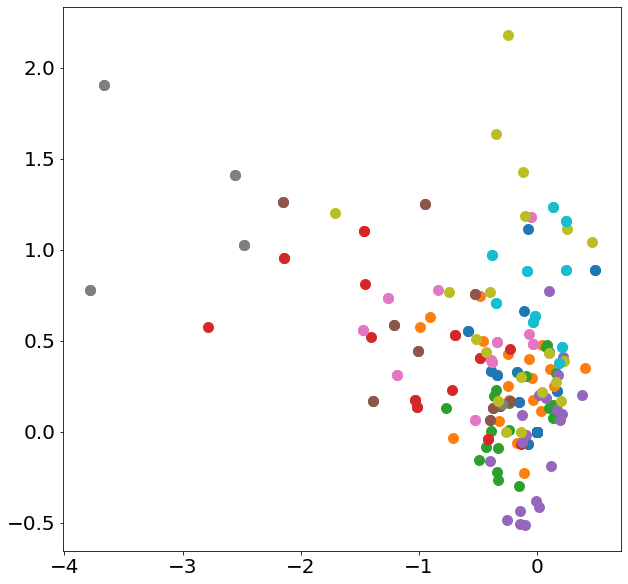

In [11]:

plot_embeddings(test_embeddings_otl, test_labels_otl,save_plot='test.png',linewidths=5, figsize=(10,10))
KNN.score(test_embeddings_otl,test_labels_otl)

Text(0, 0.5, 'Average non-zero triplets')

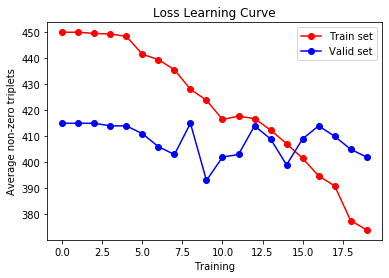

In [12]:
import matplotlib.pyplot as plt

title = 'Loss Learning Curve'
plt.title(title)
plt.plot([i for i in hist[0]], 'o-', color="r",label= "Train set")
plt.plot([i for i in hist[1]],  'o-', color="b", label="Valid set")
plt.legend(loc="best")
plt.xlabel("Training")
plt.ylabel("Average non-zero triplets")

In [13]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
preds  = KNN.predict(test_embeddings_otl)

In [14]:
cm = multilabel_confusion_matrix(test_labels_otl,preds)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0
#fig = plt.figure(figsize=(12, 8))
#ax = sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);
#fig.savefig(os.path.join(output_dir,filename ))

In [15]:
from sklearn.metrics import plot_confusion_matrix

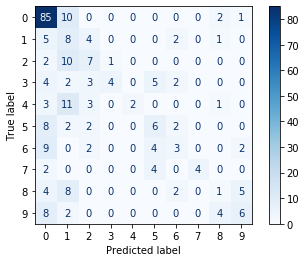

In [16]:
plot_confusion_matrix(KNN, test_embeddings_otl,test_labels_otl,
                                 display_labels=[0,1,2,3,4,5,6,7,8,9],
                                 cmap=plt.cm.Blues)

In [17]:
sum(test_labels_otl == preds)/len(test_labels_otl)

0.4701492537313433

In [18]:
len(test_labels_otl)

268

In [19]:
tokenized_train_data_ = 'top20_10_train.pkl'
tokenized_valid_data_ = 'top20_10_valid.pkl'
tokenized_test_data_ = 'top20_10_test.pkl'

train_Loader_ = data_to_Iterator(data_dir,tokenized_train_data_, False)
valid_Loader_ = data_to_Iterator(data_dir,tokenized_valid_data_, False)
#test_Loader_ = data_to_Iterator(data_dir,tokenized_test_data_, False)

other_train_emb, other_train_labels = extract_embeddings(train_Loader_, MODEL, 2)
other_valid_emb, other_valid_labels = extract_embeddings(valid_Loader_, MODEL, 2)
#other_test_emb, other_test_labels = extract_embeddings(test_Loader_, MODEL, 2)


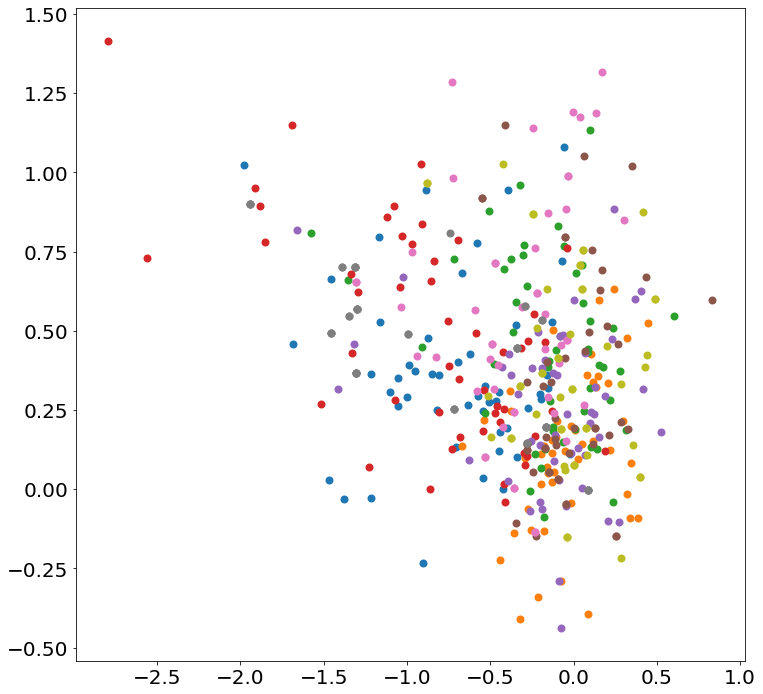

In [20]:
def plot_embeddings(embeddings, targets, xlim=None, ylim=None,  save_plot= None,linewidths=2 ,legend= False,
                   figsize=(12,12),leyend_prop=18):
    plt.figure(figsize=(figsize))
    for i in range(11,20):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=1,linewidths=linewidths )
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if legend: plt.legend(mnist_classes, prop={'size': leyend_prop} )
    plt.tick_params(axis='both', labelsize=20)
    if save_plot!=None:
        plt.savefig('../media/'+save_plot)
        
plot_embeddings(other_train_emb, other_train_labels, save_plot='training_newauthors.png', linewidths=2)

In [21]:
KNN = KNC(n_neighbors=3)
KNN.fit(other_train_emb, other_train_labels)
KNN.score(other_valid_emb, other_valid_labels)

0.36401673640167365